In [6]:
'''Code to create labels.csv'''
import os
import pandas as pd

def one_hot_encode_list(findings, labels):
    encoding = [1 if word in findings else 0 for word in labels]
    return encoding

data_dir = '/cluster/tufts/hugheslab/eharve06/HAM10000'
df = pd.read_csv(os.path.join(data_dir, 'metadata'))
labels = ['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec']
labels = ['bkl', 'nv', 'mel']
df['label'] = df['dx'].apply(lambda dx: one_hot_encode_list([dx], labels))
df['path'] = df['image_id'].apply(lambda image_id: os.path.join(data_dir, 'images/{}.jpg'.format(image_id)))
temp_df = df[['lesion_id', 'label', 'path']].set_index('lesion_id')
temp_df.to_csv(os.path.join(data_dir, 'labels.csv'))
temp_df.head()

,label,path
lesion_id,,
HAM_0000118,"[1, 0, 0]",/cluster/tufts/hugheslab/eharve06/HAM10000/ima...
HAM_0000118,"[1, 0, 0]",/cluster/tufts/hugheslab/eharve06/HAM10000/ima...
HAM_0002730,"[1, 0, 0]",/cluster/tufts/hugheslab/eharve06/HAM10000/ima...
HAM_0002730,"[1, 0, 0]",/cluster/tufts/hugheslab/eharve06/HAM10000/ima...
HAM_0001466,"[1, 0, 0]",/cluster/tufts/hugheslab/eharve06/HAM10000/ima...


In [7]:
data_dir = '/cluster/tufts/hugheslab/eharve06/HAM10000'
df = pd.read_csv(os.path.join(data_dir, 'metadata'))
df.dx.value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

In [49]:
import sys
sys.path.append('../src/')
import numpy as np

def load_experiment(path):
    df = pd.read_csv(path, index_col='Unnamed: 0')
    if 'train_auroc' in df.columns:
        df.train_auroc = df.train_auroc.apply(lambda string: np.fromstring(string[1:-1], sep=' '))
        df.val_auroc = df.val_auroc.apply(lambda string: np.fromstring(string[1:-1], sep=' '))
        df.test_auroc = df.test_auroc.apply(lambda string: np.fromstring(string[1:-1], sep=' '))
    if 'train_BA' in df.columns:
        df.train_BA = df.train_BA.apply(lambda string: np.fromstring(string[1:-1], sep=' '))
        df.val_BA = df.val_BA.apply(lambda string: np.fromstring(string[1:-1], sep=' '))
        df.test_BA = df.test_BA.apply(lambda string: np.fromstring(string[1:-1], sep=' '))
    if 'lrs' in df.columns:
        df.lrs = df.lrs.apply(lambda string: np.fromstring(string[1:-1], sep=', '))
    return df

df = load_experiment('/cluster/home/eharve06/bdl-transfer-learning/checkpoints/model_history.csv')
df.tail()

,epoch,train_loss,train_auroc,val_loss,val_auroc,test_loss,test_auroc,lrs
99,100,0.003990,"[1.0, 1.0, 1.0]",1.199337,"[0.75060241, 0.82979798, 0.77827051]",1.092664,"[0.7760075, 0.83030303, 0.72166105]","[0.00046213527649652253, 0.0003940257989661910..."
100,101,0.032829,"[1.0, 1.0, 1.0]",0.967631,"[0.77228916, 0.83181818, 0.75831486]",1.169332,"[0.80787254, 0.83111111, 0.67340067]","[0.49999948018844476, 0.4999943881759331, 0.49..."
101,102,0.112177,"[1.0, 1.0, 0.99990597]",1.256666,"[0.73253012, 0.78888889, 0.66518847]",1.049541,"[0.7235239, 0.7789899, 0.64646465]","[0.49947382159231324, 0.49939554819864884, 0.4..."
102,103,0.021545,"[1.0, 1.0, 1.0]",1.157057,"[0.76144578, 0.84242424, 0.76053215]",1.188048,"[0.75913777, 0.81616162, 0.71156004]","[0.4979629648158129, 0.49781181915080364, 0.49..."
103,104,0.004515,"[1.0, 1.0, 1.0]",1.142473,"[0.73493976, 0.82777778, 0.74390244]",1.166841,"[0.74882849, 0.82464646, 0.6969697]","[0.4954728763901717, 0.49524945534383646, 0.49..."


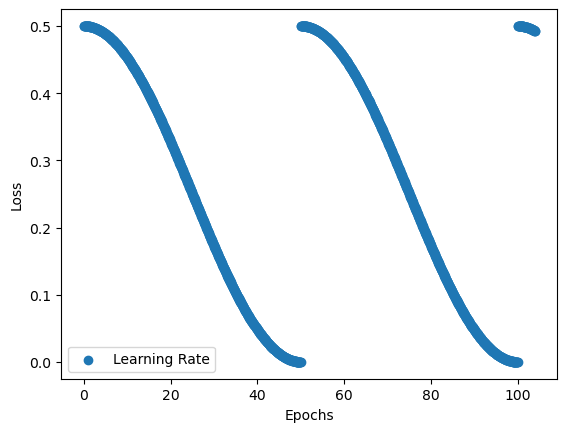

In [50]:
import matplotlib.pyplot as plt
lrs = np.array(df.lrs.to_list()).ravel()
plt.scatter(np.linspace(0, np.max(df.epoch.to_list()), len(lrs)), lrs, label='Learning Rate')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

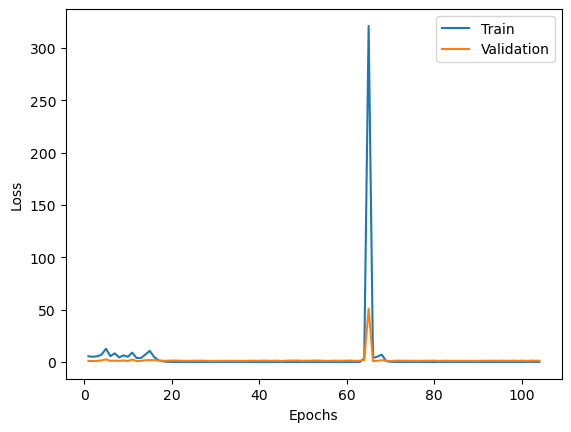

In [51]:
plt.plot(df.epoch.to_list(), df.train_loss.to_list(), label='Train')
plt.plot(df.epoch.to_list(), df.val_loss.to_list(), label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

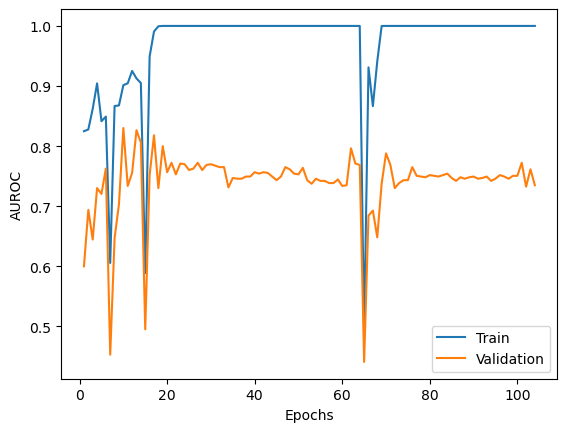

In [52]:
plt.plot(df.epoch.to_list(), np.array(df.train_auroc.to_list())[:,0], label='Train')
plt.plot(df.epoch.to_list(), np.array(df.val_auroc.to_list())[:,0], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('AUROC')
plt.legend()
plt.show()